In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import loadtxt
from keras.models import load_model
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:/Users/prera/Desktop/FINALPROJECT/data/liver_disease.csv")

In [5]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [6]:
df.shape

(583, 11)

In [7]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
col_dict={"Dataset":"classification"}

df.rename(columns=col_dict, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  classification              583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

Age : 72 values
Gender : 2 values
Total_Bilirubin : 113 values
Direct_Bilirubin : 80 values
Alkaline_Phosphotase : 263 values
Alamine_Aminotransferase : 152 values
Aspartate_Aminotransferase : 177 values
Total_Protiens : 58 values
Albumin : 40 values
Albumin_and_Globulin_Ratio : 69 values
classification : 2 values


In [11]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [12]:
print(len(numerical_features),'Numerical features: \n', numerical_features)
print('\n\n',len(categorical_features),'Categorical features:\n ', categorical_features)

9 Numerical features: 
 ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']


 2 Categorical features:
  ['Gender', 'classification']


In [13]:
df[categorical_features].dtypes

Gender            object
classification     int64
dtype: object

In [14]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

Gender has ['Female' 'Male'] categories.

classification has [1 2] categories.



In [15]:
df["classification"] = df["classification"].astype(str)

df['classification']=df['classification'].replace({'1':'liver_disease','2':'not_liver_disease'})

In [16]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

Gender has ['Female' 'Male'] categories.

classification has ['liver_disease' 'not_liver_disease'] categories.



In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,583.0,NaN,NaN,NaN,44.746141,16.189833,4.0,33.0,45.0,58.0,90.0
Gender,583,2,Male,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bilirubin,583.0,NaN,NaN,NaN,3.298799,6.209522,0.4,0.8,1.0,2.6,75.0
Direct_Bilirubin,583.0,NaN,NaN,NaN,1.486106,2.808498,0.1,0.2,0.3,1.3,19.7
Alkaline_Phosphotase,583.0,NaN,NaN,NaN,290.576329,242.937989,63.0,175.5,208.0,298.0,2110.0
Alamine_Aminotransferase,583.0,NaN,NaN,NaN,80.713551,182.620356,10.0,23.0,35.0,60.5,2000.0
Aspartate_Aminotransferase,583.0,NaN,NaN,NaN,109.910806,288.918529,10.0,25.0,42.0,87.0,4929.0
Total_Protiens,583.0,NaN,NaN,NaN,6.48319,1.085451,2.7,5.8,6.6,7.2,9.6
Albumin,583.0,NaN,NaN,NaN,3.141852,0.795519,0.9,2.6,3.1,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,NaN,NaN,NaN,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


In [18]:
df.isna().sum().sort_values(ascending=False)

Albumin_and_Globulin_Ratio    4
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
classification                0
dtype: int64

# EDA

# Target Class

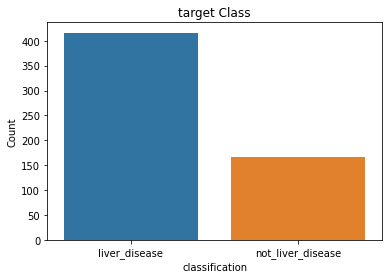

Percent of chronic kidney disease sample:  71.36 %
Percent of not a chronic kidney disease sample:  28.64 %


In [19]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='liver_disease'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='not_liver_disease'])/len(df['classification'])*100,2),"%")

# Numerical features

# Imputing numerical coulmns using MICE


https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

https://medium.com/@WalePhenomenon/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

In [20]:
((df[numerical_features].isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

Albumin_and_Globulin_Ratio    0.686106
Age                           0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
dtype: float64

In [21]:
mice_imputer = IterativeImputer() 

df[numerical_features] = mice_imputer.fit_transform(df[numerical_features]) 

In [22]:
df[numerical_features].isnull().sum().sort_values(ascending=False)

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

# Correlation

In [23]:
df.dtypes

Age                           float64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
classification                 object
dtype: object

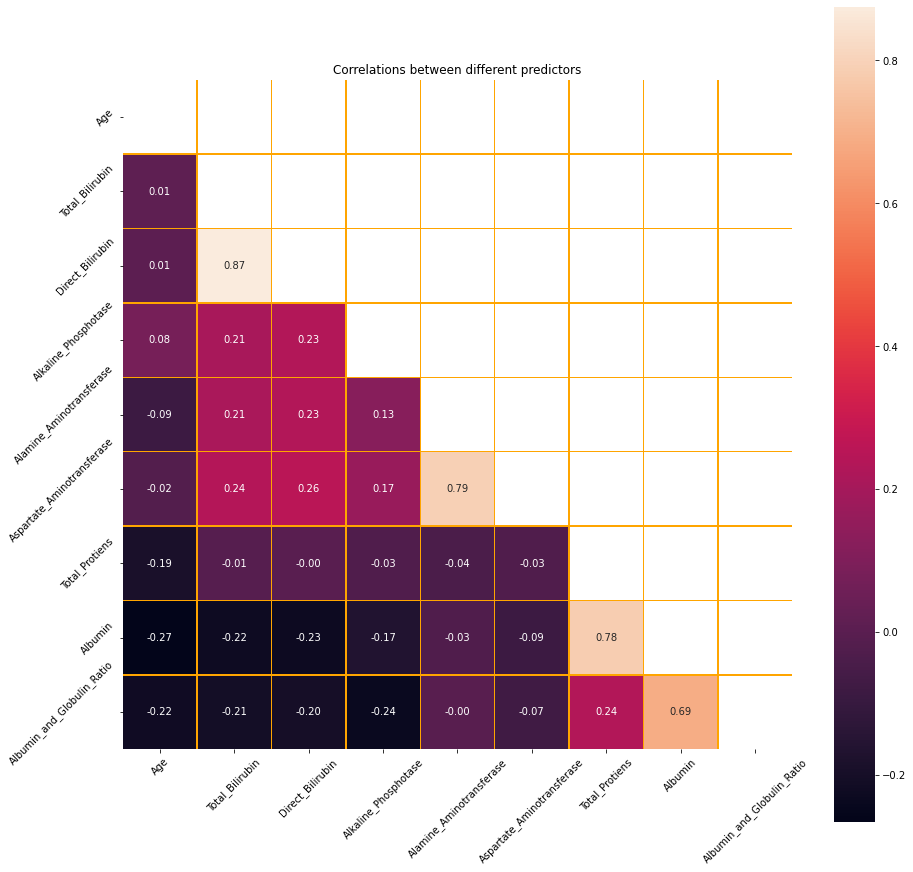

In [24]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

(9.5, -0.5)

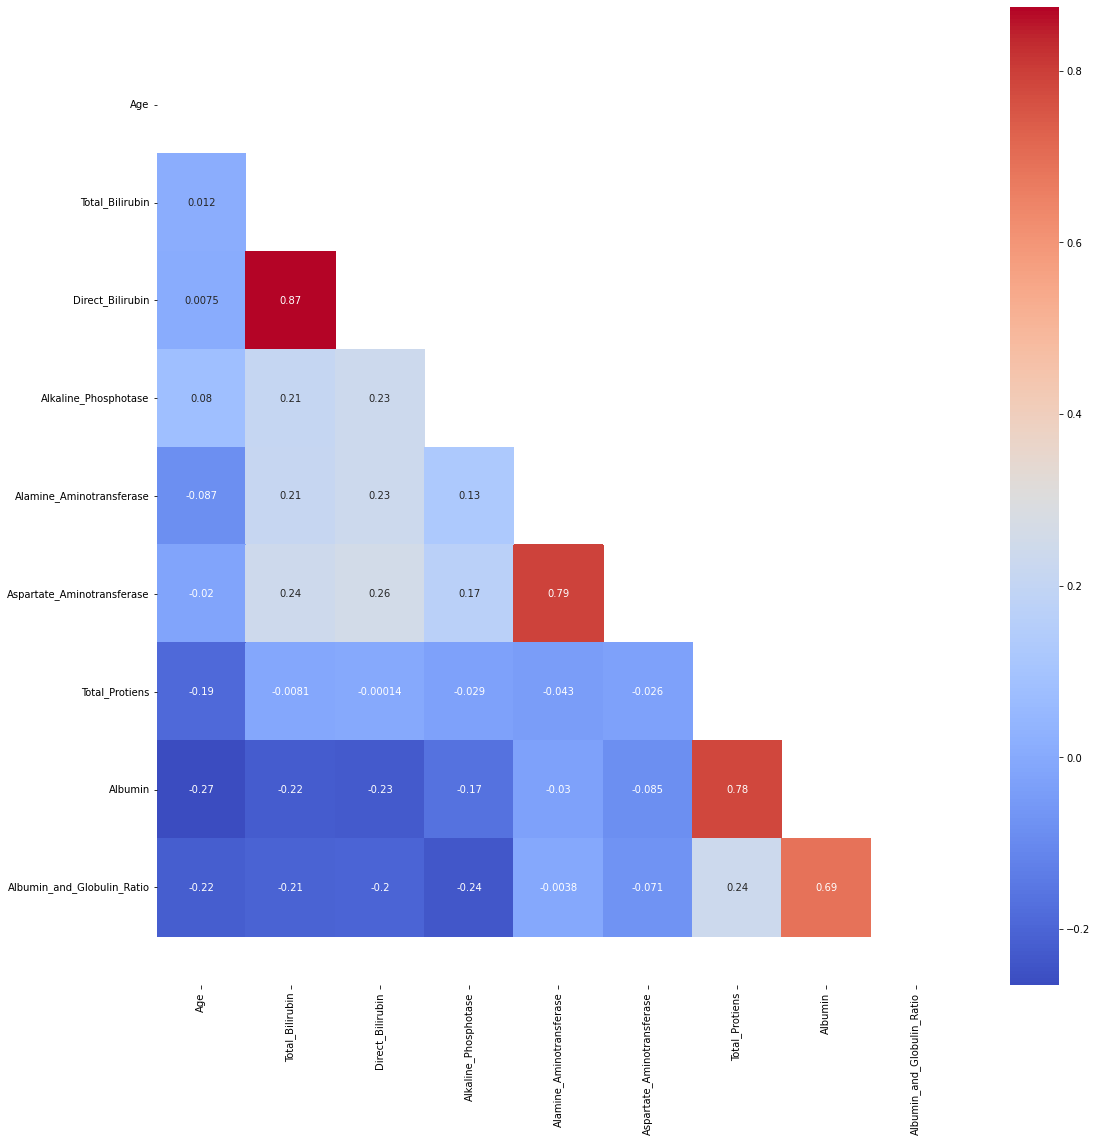

In [25]:
corr_df = df.corr()
fig, ax = plt.subplots(figsize=(18,18)) 
matrix = np.triu(corr_df)
sns.heatmap(corr_df, annot=True, cmap= 'coolwarm', ax=ax, mask = matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Categorical features

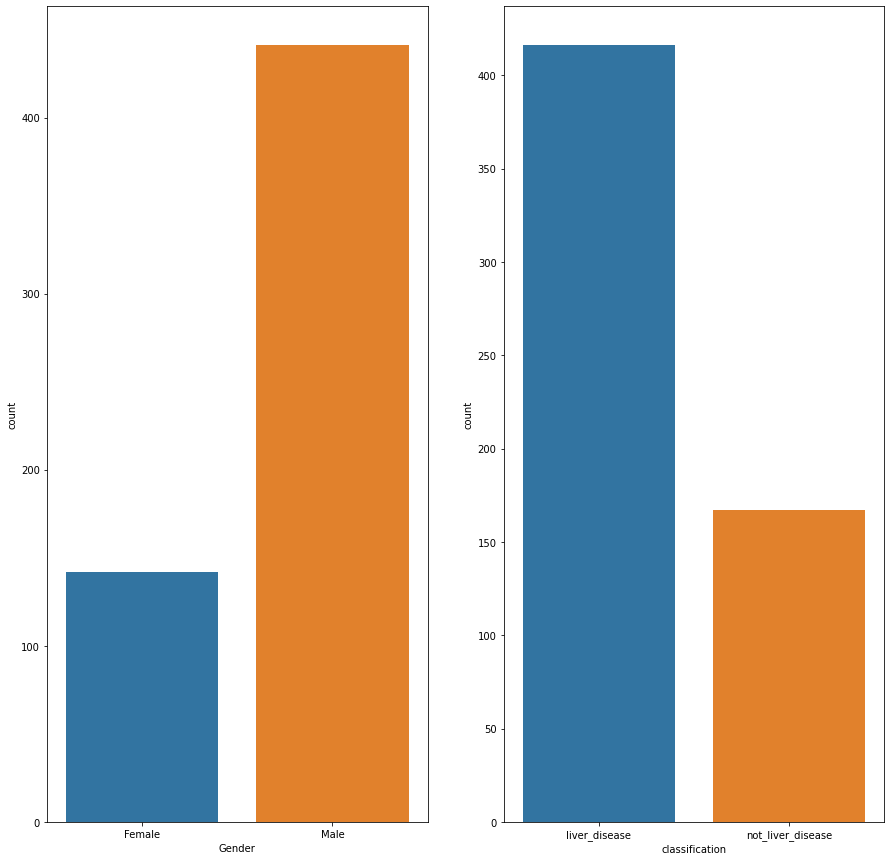

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)

for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(df[feats], ax=ax)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    float64
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  classification              583 non-null    object 
dtypes: float64(9), object(2)
memory usage: 50.2+ KB


In [28]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['classification']=df['classification'].replace({'liver_disease':1,'not_liver_disease':0})

In [29]:
df.Gender.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      1
      ..
578    1
579    1
580    1
581    1
582    1
Name: Gender, Length: 583, dtype: int64>

# Splitting into X and y

In [30]:
x = df.drop('classification', axis=1)
y = df.classification

In [31]:
y.value_counts()

1    416
0    167
Name: classification, dtype: int64

In [32]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
x

array([[0.70930233, 0.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 1.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 1.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 1.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 1.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 1.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

# OverSampling using SMOTE

In [33]:
print(Counter(y))
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
Counter(y)

Counter({1: 416, 0: 167})


Counter({1: 416, 0: 416})

# Train-Test Split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.15,random_state=0)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(707, 10)
(125, 10)
(707,)
(125,)


In [71]:
print(x_test[1,])

[0.52325581 0.         0.00268097 0.         0.05959941 0.00351759
 0.00325269 0.56521739 0.43478261 0.16      ]


In [36]:
x_test_1=x_test[1,]
x_test_1=x_test_1.reshape(1,-1)
x_test_1

array([[0.52325581, 0.        , 0.00268097, 0.        , 0.05959941,
        0.00351759, 0.00325269, 0.56521739, 0.43478261, 0.16      ]])

# Logistic Regression

In [37]:
liverlr=LogisticRegression(solver='liblinear')
liverlr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [38]:
# Accuracy
y_pred = liverlr.predict(x_test)
print('Accuracy of logistic regression classifier on test set:',liverlr.score(x_test, y_test))

Accuracy of logistic regression classifier on test set: 0.68


[[55 13]
 [27 30]]


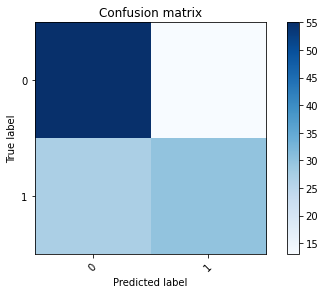

In [39]:
# Print and plot confusion matrix   
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [40]:
# Print Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        68
           1       0.70      0.53      0.60        57

    accuracy                           0.68       125
   macro avg       0.68      0.67      0.67       125
weighted avg       0.68      0.68      0.67       125



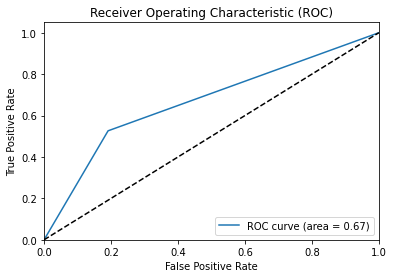

In [41]:
# Plot roc curve
plot_roc(y_pred,y_test)

# Naive Bayes

In [42]:
from sklearn.naive_bayes import BernoulliNB
liverNB = BernoulliNB()
y_pred = liverNB.fit(x_train, y_train)
y_pred = liverNB.predict(x_test)

In [43]:
#Acuracy
print("Bernoulli Naive Bayes model accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Bernoulli Naive Bayes model accuracy on test set: 0.568


[[21 47]
 [ 7 50]]


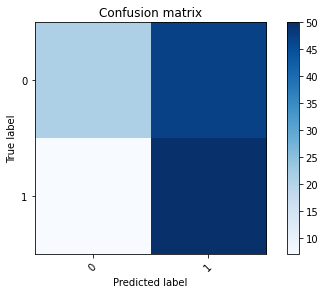

In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.31      0.44        68
           1       0.52      0.88      0.65        57

    accuracy                           0.57       125
   macro avg       0.63      0.59      0.54       125
weighted avg       0.64      0.57      0.53       125



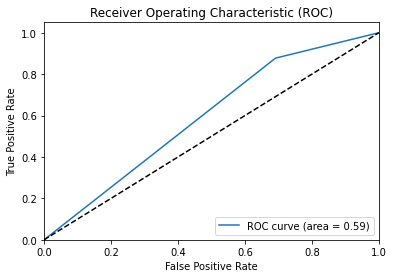

In [46]:
plot_roc(y_pred,y_test)

# Random Forest


In [47]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
liverrf = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
liverrf.fit(x_train,y_train)

y_pred=liverrf.predict(x_test)

In [48]:
#Accuracy
print("Accuracy of Random forest on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Random forest on test set: 0.784


In [49]:
print ('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))

F1 score: 0.7838325689554938


[[55 13]
 [14 43]]


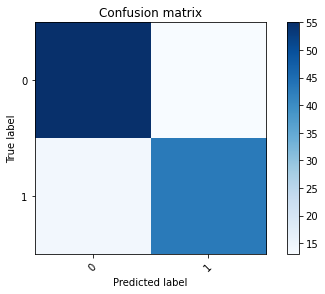

In [50]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        68
           1       0.77      0.75      0.76        57

    accuracy                           0.78       125
   macro avg       0.78      0.78      0.78       125
weighted avg       0.78      0.78      0.78       125



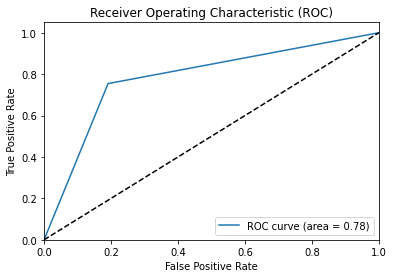

In [52]:
plot_roc(y_pred,y_test)

# XG-Boost

In [53]:
from numpy import loadtxt
from xgboost import XGBClassifier
liverxgb=XGBClassifier()
liverxgb.fit(x_train,y_train)

[14:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
y_pred = liverxgb.predict(x_test)
predictions = [round(value) for value in y_pred]

In [55]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for XGBoost on test set:", accuracy)

Accuracy for XGBoost on test set: 0.76


In [56]:
print ('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))

F1 score: 0.7590649350649351


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        68
           1       0.75      0.70      0.73        57

    accuracy                           0.76       125
   macro avg       0.76      0.76      0.76       125
weighted avg       0.76      0.76      0.76       125



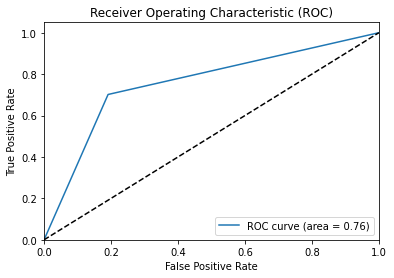

In [58]:
plot_roc(y_pred,y_test)

# Neural Network

In [59]:
livernnmodel = Sequential()
livernnmodel.add(Dense(128, input_dim=x_train.shape[1], activation='tanh'))
livernnmodel.add(Dense(32, activation='tanh'))
livernnmodel.add(Dense(8, activation='tanh'))
livernnmodel.add(Dense(1, activation='sigmoid'))

livernnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=2, mode='min')

#chckpt = ModelCheckpoint(filepath='.weights.hdf5', verbose=1, save_best_only=True)

livernnmodel.fit(x_train,y_train,verbose=2,epochs=200, batch_size=20, callbacks=[monitor], validation_split=0.25)

Epoch 1/200
27/27 - 1s - loss: 0.6733 - accuracy: 0.5604 - val_loss: 0.6581 - val_accuracy: 0.6554
Epoch 2/200
27/27 - 0s - loss: 0.6300 - accuracy: 0.6547 - val_loss: 0.6363 - val_accuracy: 0.6554
Epoch 3/200
27/27 - 0s - loss: 0.5987 - accuracy: 0.6849 - val_loss: 0.6211 - val_accuracy: 0.6441
Epoch 4/200
27/27 - 0s - loss: 0.5756 - accuracy: 0.6868 - val_loss: 0.6199 - val_accuracy: 0.5989
Epoch 5/200
27/27 - 0s - loss: 0.5614 - accuracy: 0.7057 - val_loss: 0.6213 - val_accuracy: 0.6723
Epoch 6/200
27/27 - 0s - loss: 0.5551 - accuracy: 0.6962 - val_loss: 0.6054 - val_accuracy: 0.6780
Epoch 7/200
27/27 - 0s - loss: 0.5551 - accuracy: 0.6962 - val_loss: 0.6101 - val_accuracy: 0.6102
Epoch 8/200
27/27 - 0s - loss: 0.5477 - accuracy: 0.7151 - val_loss: 0.6023 - val_accuracy: 0.6723
Epoch 9/200
27/27 - 0s - loss: 0.5394 - accuracy: 0.7208 - val_loss: 0.6113 - val_accuracy: 0.6780
Epoch 10/200
27/27 - 0s - loss: 0.5339 - accuracy: 0.7264 - val_loss: 0.6061 - val_accuracy: 0.7006
Epoch 11/

In [60]:
livernnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 5,809
Trainable params: 5,809
Non-trainable params: 0
_________________________________________________________________


In [61]:
y_pred = livernnmodel.predict(x_test)
y_pred
argmax = []
for val in y_pred:
    if val >= 0.5:
      argmax.append(1)
    else:
        argmax.append(0)
argmax[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [62]:
accuracy = accuracy_score(y_test,argmax)
print("Accuracy for neural network on test set:", accuracy)

Accuracy for neural network on test set: 0.736


[[59  9]
 [24 33]]


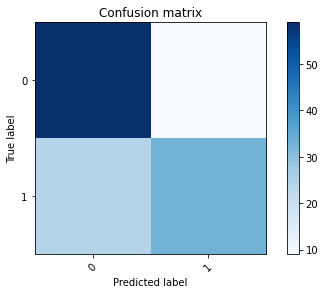

In [63]:
cm = confusion_matrix(y_test, argmax)
print(cm)
plot_confusion_matrix(cm,['0','1'])

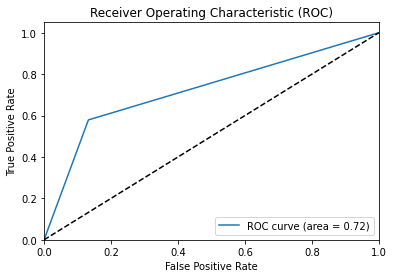

In [64]:
plot_roc(argmax,y_test)

# Saving Model

In [65]:
import pickle
pickle.dump(liverrf,open("C:/Users/prera/Desktop/FINALPROJECT/models/liver_model.pkl","wb"))

In [69]:
x_test_2=x_test[2,]

x_test_2=x_test_2.reshape(1,-1)

x_test_2

array([[0.65116279, 1.        , 0.01474531, 0.0255102 , 0.14509038,
        0.11055276, 0.05854849, 0.26086957, 0.23913043, 0.2       ]])

In [70]:
model=pickle.load(open("C:/Users/prera/Desktop/FINALPROJECT/models/liver_model.pkl","rb"))
result = model.predict(x_test_2)
resultp=model.predict_proba(x_test_2)
print(resultp)

[[0.09 0.91]]


In [67]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.predict_proba(x_test_1)
# print(result)

In [68]:
# 90% --> .9>.88  no
# 80% --> .8>.88  yes